In [1]:
# -*- coding: utf-8 -*-

print(__doc__)




import pandas as pd
import numpy as np
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import cross_validation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import svm

import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import StratifiedKFold

###############################################################################
# Data IO and generation,导入iris数据，做数据准备
# load data
data = read_csv('final2.csv')
# import some data to play with
x = data[list(range(288))]
y = data[[288]]
X=x.values
newy=[]
for item in range(len(y)):
    if(y.iloc[item,0]==0):
        newy.append(0)
    if(y.iloc[item,0]==1):
        newy.append(1)


y=np.array(newy)
n_samples, n_features = X.shape
print y
# Add noisy features
#random_state = np.random.RandomState(0)
#X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]
print X.shape
print y.shape


Automatically created module for IPython interactive environment


/usr/local/Cellar/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


[1 0 0 ..., 0 1 0]
(10356, 288)
(10356,)


In [9]:

###############################################################################
# Classification and ROC analysis
#分类，做ROC分析

# Run classifier with cross-validation and plot ROC curves
#使用6折交叉验证，并且画ROC曲线
cv = StratifiedKFold(y, n_folds=3)
classifier = LinearDiscriminantAnalysis()#注意这里，probability=True,需要，不然预测的时候会出现异常。另外rbf核效果更好些。

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []
print cv
for i, (train, test) in enumerate(cv):
    print i
    print train
    print test

sklearn.cross_validation.StratifiedKFold(labels=[1 0 0 ..., 0 1 0], n_folds=3, shuffle=False, random_state=None)
0
[ 2792  2795  2797 ..., 10353 10354 10355]
[   0    1    2 ..., 3698 3699 3700]
1
[    0     1     2 ..., 10353 10354 10355]
[2792 2795 2797 ..., 7063 7064 7065]
2
[   0    1    2 ..., 7063 7064 7065]
[ 6502  6503  6504 ..., 10353 10354 10355]


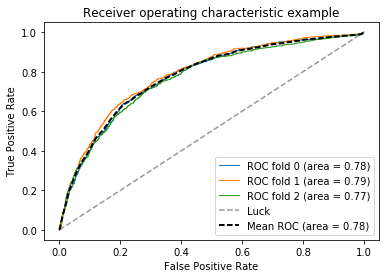

In [10]:

for i, (train, test) in enumerate(cv):
	#通过训练数据，使用svm线性核建立模型，并对测试集进行测试，求出预测得分
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)			#对mean_tpr在mean_fpr处进行插值，通过scipy包调用interp()函数
    mean_tpr[0] = 0.0 								#初始处为0
    roc_auc = auc(fpr, tpr)
    #画图，只需要plt.plot(fpr,tpr),变量roc_auc只是记录auc的值，通过auc()函数能计算出来
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

#画对角线
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

mean_tpr /= len(cv) 					#在mean_fpr100个点，每个点处插值插值多次取平均
mean_tpr[-1] = 1.0 						#坐标最后一个点为（1,1）
mean_auc = auc(mean_fpr, mean_tpr)		#计算平均AUC值
#画平均ROC曲线
#print mean_fpr,len(mean_fpr)
#print mean_tpr
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()